In [2]:
graphics_toolkit('gnuplot')
pkg load interval
addpath(genpath('./octave-interval-examples/m'))



The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are unlikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update its internal list of open figure windows.
The qt toolkit is recommended instead.


In [24]:
load Temp20200601.mat
t = therm(7:8, :);
line_1 = therm(7, :);
line_2 = therm(8, :);
s = size(line_1);
x = 1:s(2);


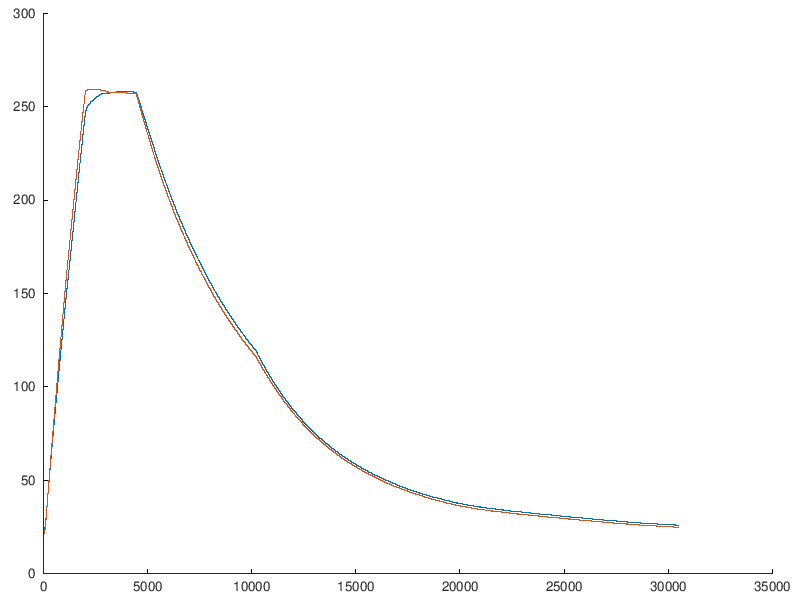

In [25]:
figure(1, 'position',[0, 0, 800, 600]);
%grid on
hold on
plot(x, line_1)
plot(x, line_2)


Линейный участок примерно в [100, 2000]. Необходимо исследовать область линейности функций: определить этот участок точнее.

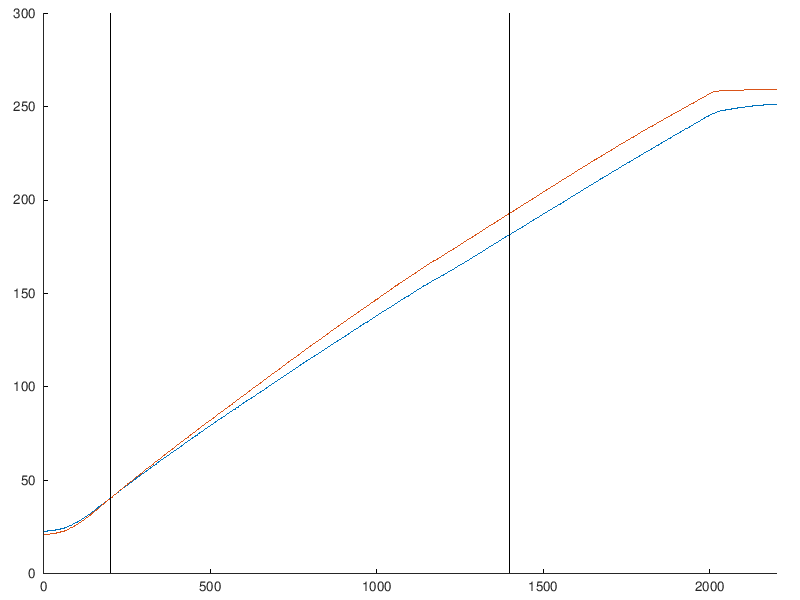

In [5]:
figure(1, 'position',[0, 0, 800, 600]);
%grid on
hold on
plot(x, line_1)
plot(x, line_2)
plot([200, 200], [0, 300], "k")
plot([1400,1400], [0, 300], "k")
xlim([0, 2200])

In [6]:
left_threshold = 1
right_threshold = 500


data_1 = line_1(left_threshold:right_threshold);
data_2 = line_2(left_threshold:right_threshold);
indexes = x(left_threshold:right_threshold);

left_threshold = 1
right_threshold = 500


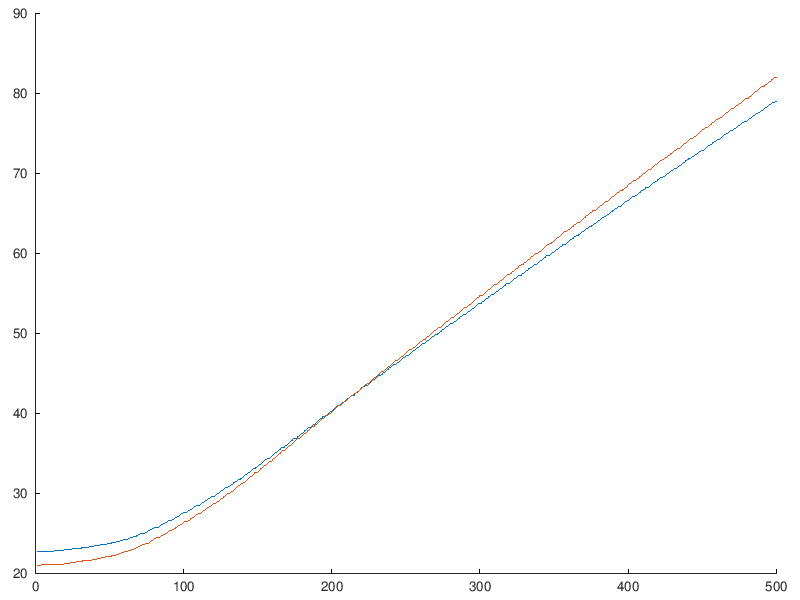

In [7]:
figure(1, 'position',[0, 0, 800, 600]);
hold on
plot(indexes, data_1)
plot(indexes, data_2)

left_threshold_2 = 1000
right_threshold_2 = 2000


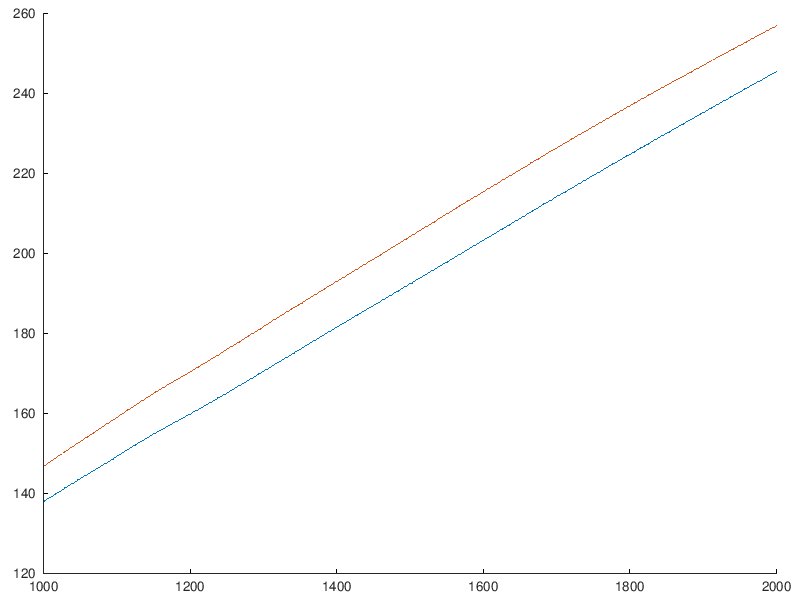

In [8]:
left_threshold_2 = 1000
right_threshold_2 = 2000


data_3 = line_1(left_threshold_2:right_threshold_2);
data_4 = line_2(left_threshold_2:right_threshold_2);
indexes_2 = x(left_threshold_2:right_threshold_2);
figure(1, 'position',[0, 0, 800, 600]);
hold on
plot(indexes_2, data_3)
plot(indexes_2, data_4)

n = 10
start_i = 1
step = 40
end_i = 400
inds =

     1    41    81   121   161   201   241   281   321   361



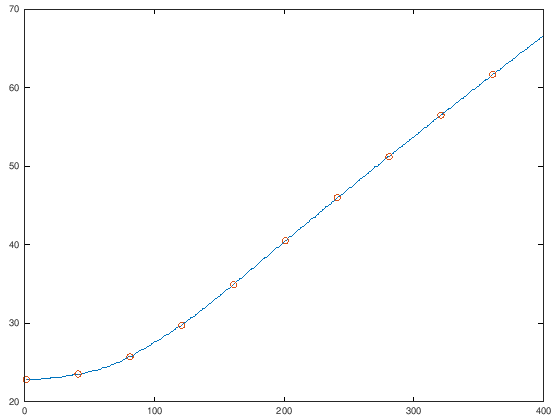

In [9]:
n = 10
start_i = 1
step = 40
end_i = n*step
inds = [start_i:step:end_i]

figure
plot(indexes(start_i:end_i), data_1(start_i:end_i), "-")
hold on
plot(indexes(inds), data_1(inds), "o")

n = 10
start_i = 1
step = 100
end_i = 1000
inds =

     1   101   201   301   401   501   601   701   801   901



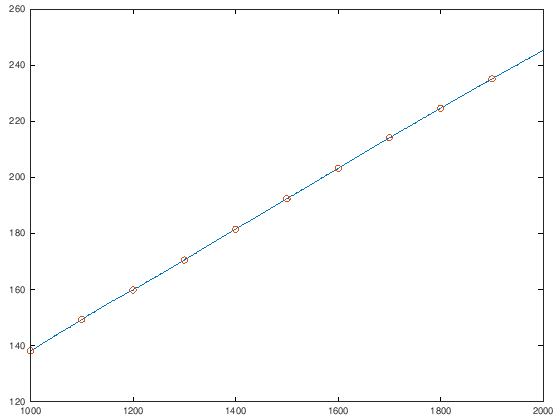

In [11]:
n = 10
start_i = 1
step = 100
end_i = n*step
inds = [start_i:step:end_i]

figure
plot(indexes_2(start_i:end_i), data_3(start_i:end_i), "-")
hold on
plot(indexes_2(inds), data_3(inds), "o")

In [17]:
## Определить задачу построения интервальной регрессии 
##     y = X * beta = beta1 + beta2 * x 
## с ограничением beta2 >= 0
n = 10
start_i = 1
step = 100
end_i = n*step
inds = [start_i:step:end_i]
x = indexes_2(inds);        
y = data_3(inds);        

epsilon = zeros(1, n) + 0.1;  



x = reshape(x, size(x)(2), size(x)(1));
y = reshape(y, size(y)(2), size(y)(1));
epsilon = reshape(epsilon, size(epsilon)(2), size(epsilon)(1));

X = [ x.^0 x ];                              
lb = [-inf 0];                                
irp_temp = ir_problem(X, y, epsilon, lb);  

display(x)
display(y)
display(epsilon)

n = 10
start_i = 1
step = 100
end_i = 1000
inds =

     1   101   201   301   401   501   601   701   801   901

x =

   1000
   1100
   1200
   1300
   1400
   1500
   1600
   1700
   1800
   1900

y =

   138.10
   149.30
   159.80
   170.50
   181.50
   192.40
   203.20
   214.20
   224.70
   235.20

epsilon =

   0.1000
   0.1000
   0.1000
   0.1000
   0.1000
   0.1000
   0.1000
   0.1000
   0.1000
   0.1000



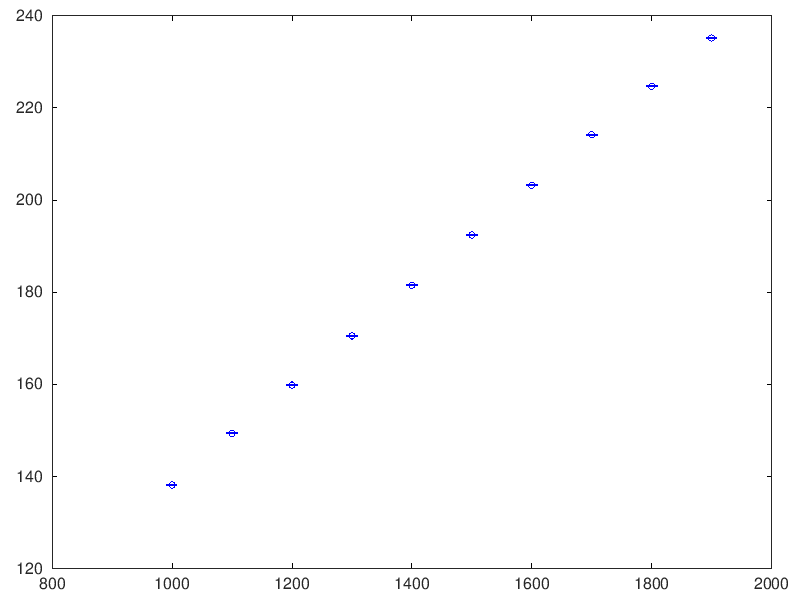

In [18]:
## График интервальных измерений
figure('position',[0, 0, 800, 600]);

ir_scatter(irp_temp);   
set(gca, 'fontsize', 12)


Можно добавить график обычной МНК регрессии

b_lsm =

   30.2285    0.1080



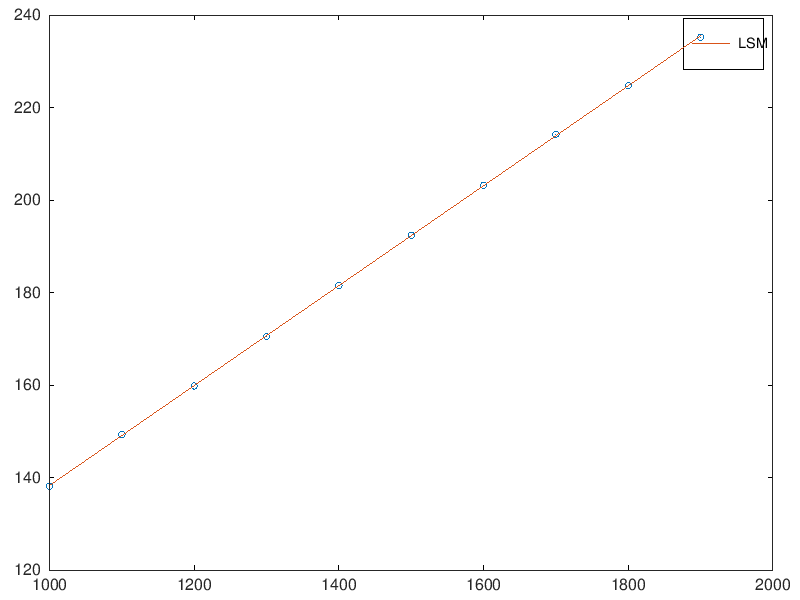

In [19]:
## Линейная регрессия МНК

b_lsm = (X \ y)'  
MNK_line = [b_lsm(1) + b_lsm(2) * min(x), b_lsm(1) + b_lsm(2) * max(x)];


figure('position',[0, 0, 800, 600]);

plot(x, y, "o")
hold on
plot([min(x),  max(x)], MNK_line)
set(gca, 'fontsize', 12)

legend("", "LSM")


QH6412 qhull input error (qh_initqhull_globals): expecting between 1 and 2147483631 points.  Got 0 0-d points

While executing:  | qhull Qt
Options selected for Qhull 2020.2.r 2020/08/31:
  run-id 775991539  Qtriangulate  _maxoutside  0
error: convhulln: qhull failed
error: called from
    ir_beta2poly at line 77 column 5
    ir_plotbeta at line 59 column 10


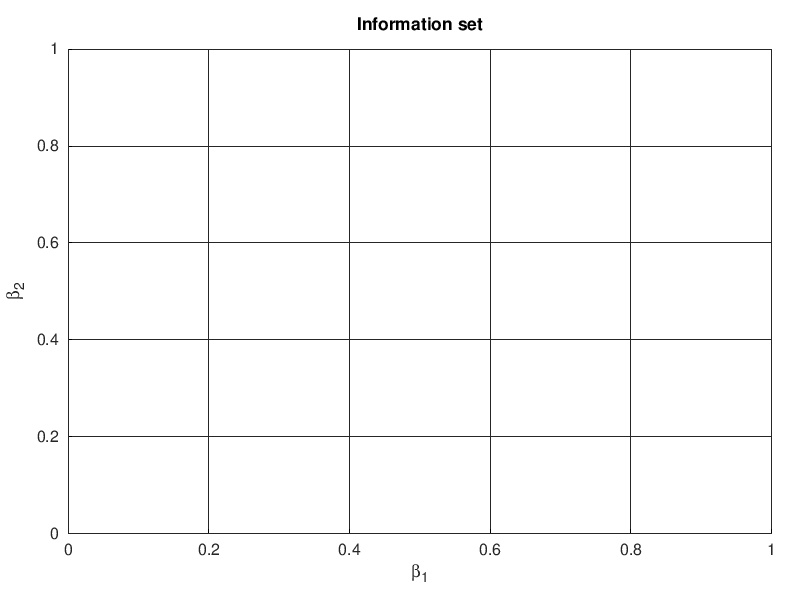

In [20]:
## Информационное множество
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')

In [21]:
function [w] = linear(epsilon, x, y)
    eps = epsilon;
    m = size(x)(1)
    C = zeros(1, m + 2);
    for i = 1:m
    C(i) = 1;
    end
    % display(C)
    A = zeros(2*m, m+2);

    for i = 1:m
    A(2 * i - 1, i) = eps(i);
    A(2 * i, i) = eps(i);

    A(2 * i - 1, m + 1) = 1;
    A(2 * i, m + 1) = -1;

    A(2 * i - 1, m + 2) = x(i);
    A(2 * i, m + 2) = -x(i);

    end

    % display(A)

    B = zeros(1, 2*m);
    for i = 1:m
    B(2 * i - 1) = y(i);
    B(2 * i) = -y(i);
    end

    % display(B)

    lb = zeros(1, m+2);
    for i = 1:m
    lb(i) = 1;
    end

    lb(m+2) = -inf;

    % display(lb)

    ctype = "";
    for i = 1:2 * m
    ctype(i) = 'L';
    end

    % display(ctype);

    vartype = "";
    for i = 1:m + 2
    vartype(i) = 'C';
    end

    % display(vartype);

    sense = 1;
    output_precision(4)
    w = glpk(C,A,B,lb,[],ctype,vartype,sense)
endfunction

##### Решение ЗЛП

In [22]:
linear(epsilon, x, y)

m = 10
w =

    1.000
    2.800
    1.000
    1.600
    1.000
    1.000
    1.000
    2.600
    1.000
    3.800
   30.000
    0.108

ans =

    1.000
    2.800
    1.000
    1.600
    1.000
    1.000
    1.000
    2.600
    1.000
    3.800
   30.000
    0.108



## Повторные решения задачи с удалением выбросов

In [18]:
function [x, indexes, data_1] = prep_data(line_1, left_threshold, right_threshold)
    s = size(line_1);
    x = 1:s(2);
    data_1 = line_1(left_threshold:right_threshold);
    indexes = x(left_threshold:right_threshold);
endfunction


left_threshold = 1000
right_threshold = 2000
error: 'prep_data' undefined near line 1, column 26
n = 8
inds =

   100   199   298   397   496   595   694   793

inds =

   100   199   298   397   496   595   694   793

m = 8
w =

    1.000
    1.000
    2.000
    1.000
    1.000
    1.000
    1.000
    1.000
   30.219
    0.108

b_lsm =

   30.110    0.108

QH6412 qhull input error (qh_initqhull_globals): expecting between 1 and 2147483631 points.  Got 0 0-d points

While executing:  | qhull Qt
Options selected for Qhull 2020.2.r 2020/08/31:
  run-id 2065727105  Qtriangulate  _maxoutside  0
error: convhulln: qhull failed
error: called from
    ir_beta2poly at line 77 column 5
    ir_plotbeta at line 59 column 10


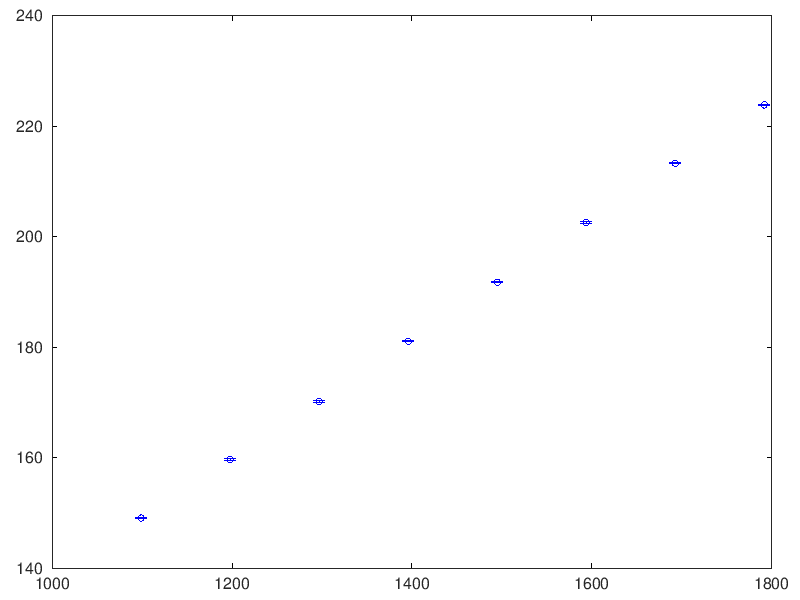

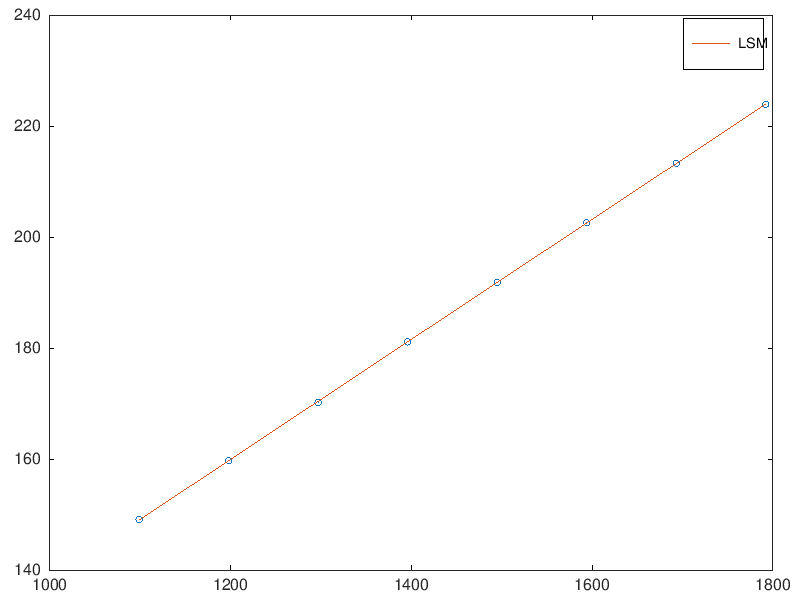

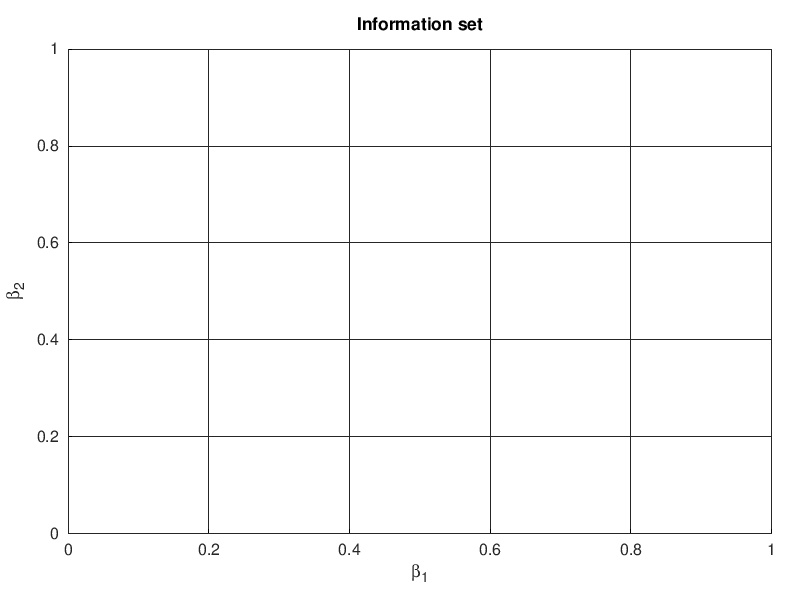

In [27]:
left_threshold = 1000
right_threshold = 2000

% [x, indexes, data_1] = prep_data(line_1,left_threshold, right_threshold);
[x, indexes_2, data_3] = prep_data(line_1,left_threshold, right_threshold);
n = 10;
start_i = 1;
step = floor((right_threshold - left_threshold - start_i) / n);
end_i = n * step;
inds = [start_i:step:end_i];
n = 8
inds = inds(:,2:9)
display(inds)

% x = indexes(inds);        
% y = data_1(inds);   

x = indexes_2(inds);        
y = data_3(inds); 

epsilon = zeros(1, n) + 0.1; 
x = reshape(x, size(x)(2), size(x)(1));
y = reshape(y, size(y)(2), size(y)(1));
epsilon = reshape(epsilon, size(epsilon)(2), size(epsilon)(1));
eps = epsilon;


X = [ x.^0 x ];                              
lb = [-inf 0];                                
irp_temp = ir_problem(X, y, epsilon, lb);

% display(x)
% display(y)
% display(epsilon)

# ЗЛП
w = linear(epsilon, x, y);
## График интервальных измерений
figure('position',[0, 0, 800, 600]);

ir_scatter(irp_temp);   
set(gca, 'fontsize', 12)

## Линейная регрессия МНК

b_lsm = (X \ y)'  
MNK_line = [b_lsm(1) + b_lsm(2) * min(x), b_lsm(1) + b_lsm(2) * max(x)];



figure('position',[0, 0, 800, 600]);

plot(x, y, "o")
hold on
plot([min(x),  max(x)], MNK_line)
set(gca, 'fontsize', 12)

legend("", "LSM")

## Графическое представление информационного множества
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')

#### Коридор совместных зависимостей

scale = 2.000


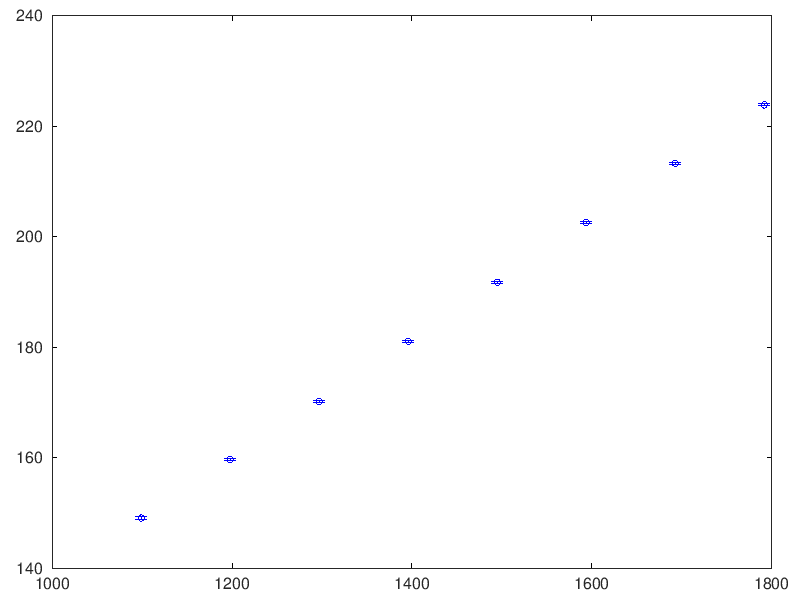

In [28]:
scale = max(w(1:n))
for i = 1:n
    eps(i) = epsilon(i) * scale;
end

X = [ x.^0 x ];                               # матрица значений переменных при beta1 и beta2
lb = [-inf 0];                                # нижние границы beta1 и beta2
irp_temp = ir_problem(X, y, eps, lb);    # создание переменной, содержащей описание задачи 


## График интервальных измерений
figure('position',[0, 0, 800, 600]);

ir_scatter(irp_temp);   
# xlim([0 22])
# ylim([-10 260])
set(gca, 'fontsize', 12)
#title('Steam generator performance');
#xlabel('Fuel consumption');
#ylabel('Steam quantity');


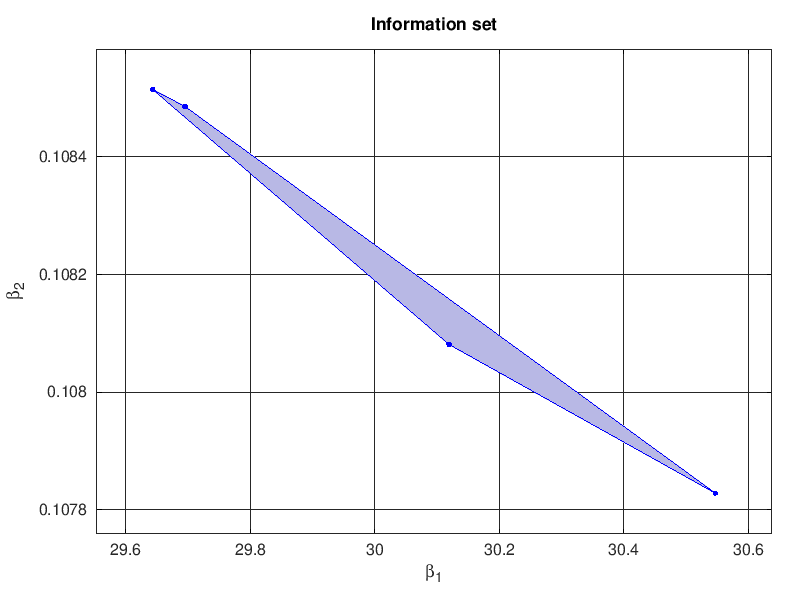

In [32]:
## Информационное множество
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')


In [33]:
## Вершины информационного множества задачи построения интервальной регрессии
vertices = ir_beta2poly(irp_temp)

## Диаметр и наиболее удаленные вершины информационного множества 
[rhoB, b1, b2] = ir_betadiam(irp_temp)

vertices =

   29.643    0.109
   30.119    0.108
   30.119    0.108
   30.547    0.108
   29.695    0.108

rhoB = 0.903
b1 =

   30.547    0.108

b2 =

   29.643    0.109



In [34]:
## Внешние интервальние оценки параметров модели y = beta1 + beta2 * x 
b_int = ir_outer(irp_temp)

b_int =

   29.643   30.547
    0.108    0.109



In [30]:
## Точечные оценки параметров 
b_maxdiag = (b1 + b2) / 2    # как середина наибольшей диагонали информационного множества

b_gravity = mean(vertices)   # как центр тяжести информационного множества 

b_lsm = (X \ y)'             # методом наименьших квадратов

b_maxdiag =

   30.095    0.108

b_gravity =

   30.025    0.108

b_lsm =

   30.110    0.108



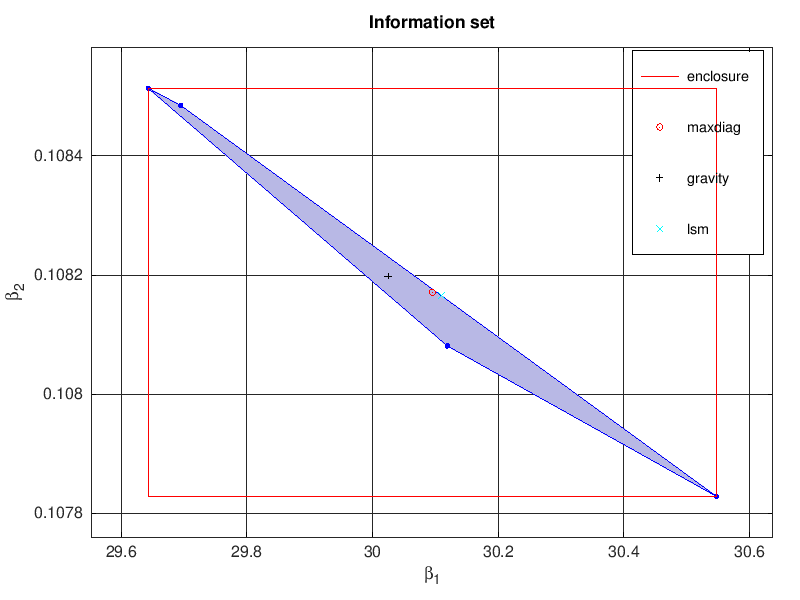

In [35]:
## Внешняя интервальная оценка информационного множества
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
hold on
ir_plotrect(b_int,'r-')
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')

## Точечные оценки
plot(b_maxdiag(1), b_maxdiag(2), 'ro')
plot(b_gravity(1), b_gravity(2), 'k+')
plot(b_lsm(1), b_lsm(2), 'cx')
legend("", "", "enclosure", "maxdiag",  "gravity", "lsm")


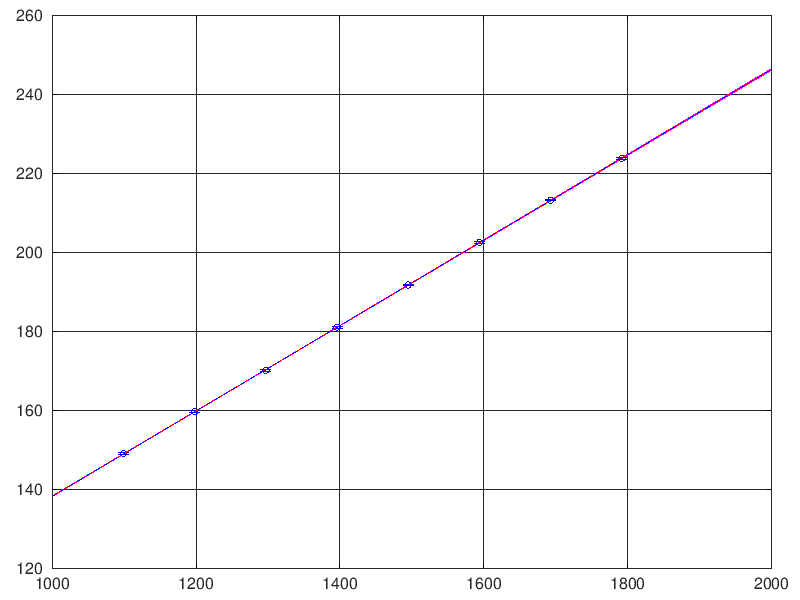

In [37]:
## Коридор совместных зависимостей для модели y = beta1 + beta2 * x
figure('position',[0, 0, 800, 600]);
xlimits = [1000 2000];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей

hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
ir_plotline(b_maxdiag, xlimits, 'r-')   # зависимость с параметрами, оцененными как центр наибольшей диагонали ИМ
ir_plotline(b_gravity, xlim, 'b--')     # зависимость с параметрами, оцененными как центр тяжести ИМ  
# ir_plotline(b_lsm, xlim, 'b--')         # зависимость с параметрами, оцененными МНК
# ir_scatter(ir_problem(Xp,ypmid,yprad),'ro')

grid on
set(gca, 'fontsize', 12)
# xlabel('Fuel consumtion')
# ylabel('Steam quantity')
# title('Set of models compatible with data and constraints')

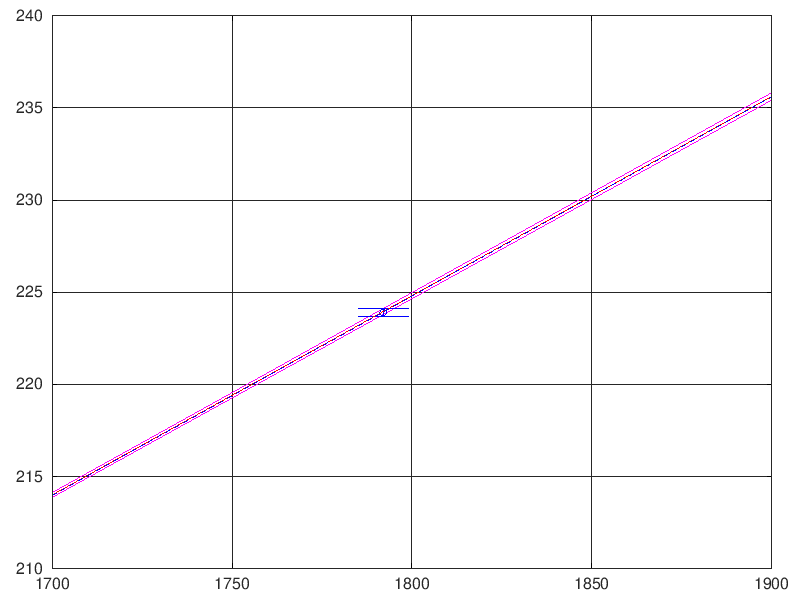

In [39]:
## Коридор совместных зависимостей для модели y = beta1 + beta2 * x
figure('position',[0, 0, 800, 600]);
xlimits = [1100 2000];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей

hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
ir_plotline(b_maxdiag, xlimits, 'r-')   # зависимость с параметрами, оцененными как центр наибольшей диагонали ИМ
ir_plotline(b_gravity, xlim, 'b--')     # зависимость с параметрами, оцененными как центр тяжести ИМ  
# ir_plotline(b_lsm, xlim, 'b--')         # зависимость с параметрами, оцененными МНК
# ir_scatter(ir_problem(Xp,ypmid,yprad),'ro')

grid on
set(gca, 'fontsize', 12)
# xlabel('Fuel consumtion')
# ylabel('Steam quantity')
# title('Set of models compatible with data and constraints')

xlim([1700,1900])
ylim([210,240])

### Предсказание значений функции

In [37]:
## Значения функции, предсказанные с помощью модели y = beta1 + beta2 * x в точках эксперимента
yp0 = ir_predict(irp_temp, X)       # интервальный прогноз значений y в точках x

yp0mid = mean(yp0,2)                 # средние значения прогнозных интервалов
yp0rad = 0.5 * (yp0(:,2) - yp0(:,1)) # радиус прогнозных интервалов

yp0rad_rel = 100 * yp0rad ./ yp0mid  # относительная величина неопределенности прогнозов в процентах

yp0 =

   21.00   24.85
   27.00   30.30
   33.00   35.90
   39.00   42.44
   45.00   48.98
   51.00   55.52
   57.00   62.06
   63.00   68.60

yp0mid =

   22.92
   28.65
   34.45
   40.72
   46.99
   53.26
   59.53
   65.80

yp0rad =

   1.925
   1.650
   1.450
   1.720
   1.990
   2.260
   2.530
   2.800

yp0rad_rel =

   8.397
   5.759
   4.209
   4.224
   4.235
   4.243
   4.250
   4.255



In [41]:
## Значения y, предсказанные с помощью модели y = beta1 + beta2 * x в точках наблюдения неопределенности 
xp = [1000; 1200; 1400; 1600; 1800]      # точки наблюдения
Xp = [xp.^0 xp];
output_precision(4)

yp = ir_predict(irp_temp, Xp)         # интервальный прогноз значений y в точках xp
ypmid = mean(yp,2)                     # средние значения прогнозных интервалов
yprad = 0.5 * (yp(:,2) - yp(:,1))      # радиус прогнозных интервалов

yprad_relative = 100 * yprad ./ ypmid  # относительная величина неопределенности прогнозов в процентах

xp =

   1000
   1200
   1400
   1600
   1800

yp =

   138.2   138.4
   159.8   159.9
   181.4   181.6
   203.0   203.3
   224.6   225.0

ypmid =

   138.3
   159.9
   181.5
   203.2
   224.8

yprad =

   0.10894
   0.06225
   0.07081
   0.11122
   0.16525

yprad_relative =

   0.07879
   0.03894
   0.03901
   0.05474
   0.07351



### Граничные точки

In [42]:
# Поиск граничных точек
MY_EPS = 0.00001;
## Значения y, предсказанные с помощью модели y = beta1 + beta2 * x в точках эксперимента
irp_temp;
cur_x = irp_temp.y;
cur_eps = irp_temp.epsilon;

yp0 = ir_predict(irp_temp, X); 

for i = 1:n
x_top = cur_x(i) + cur_eps(i);
x_bot = cur_x(i) - cur_eps(i);

y_top = yp0(i, 2);
y_bot = yp0(i, 1);

if abs(y_top - x_top) < MY_EPS
    display(i)
    
end

if abs(y_bot - x_bot) < MY_EPS
    display(i)
end


end



i = 1
i = 3
i = 6
i = 7
i = 8


m = 8


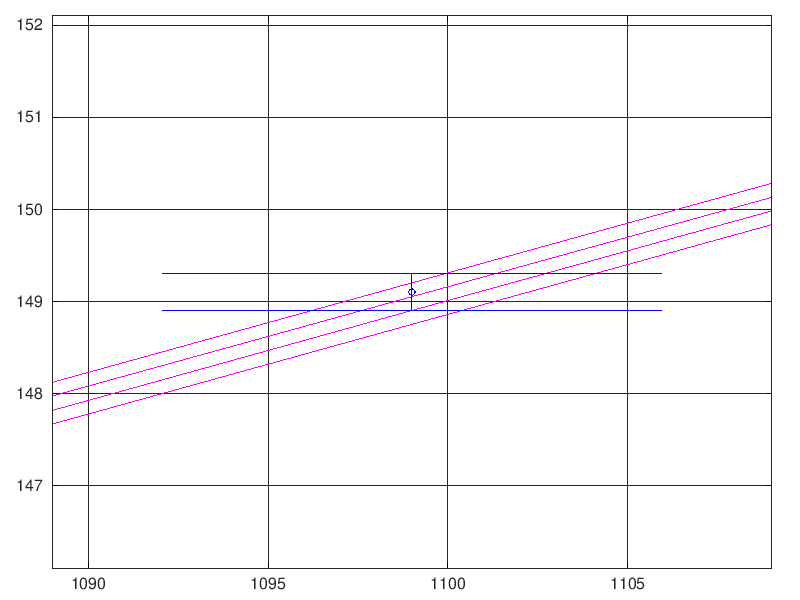

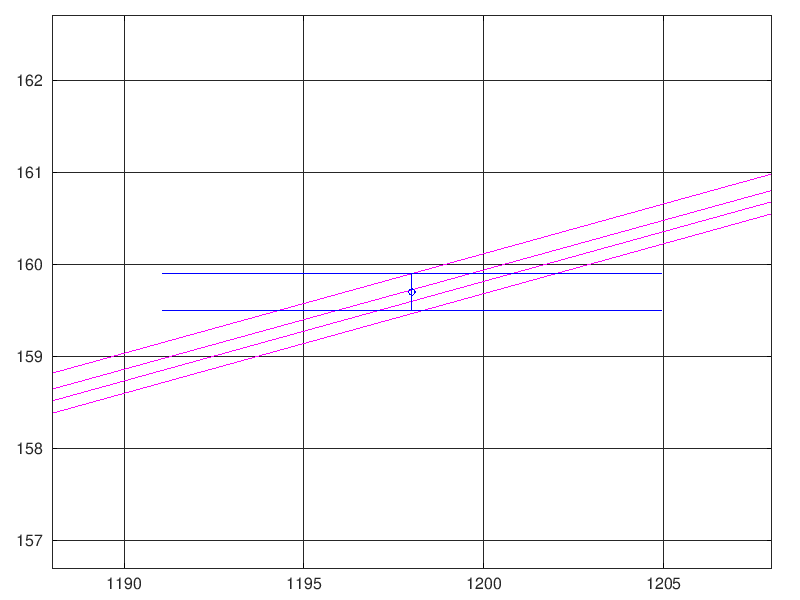

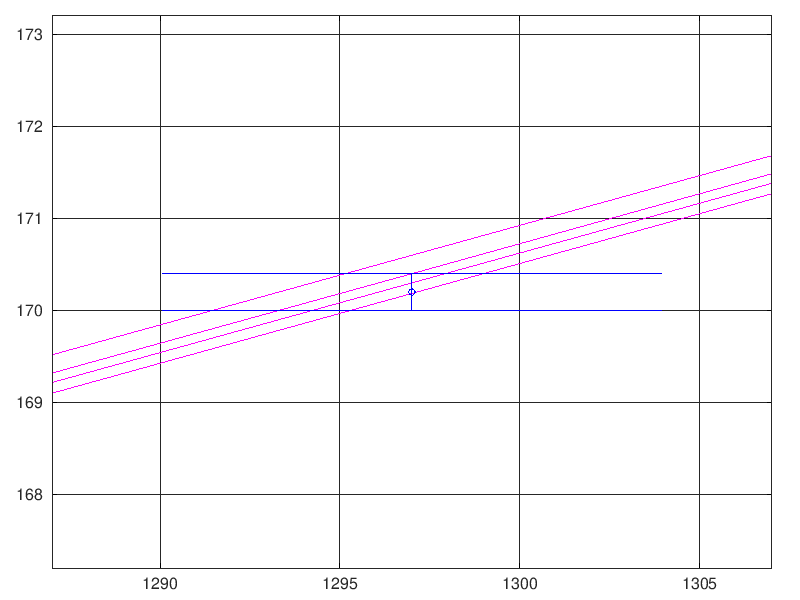

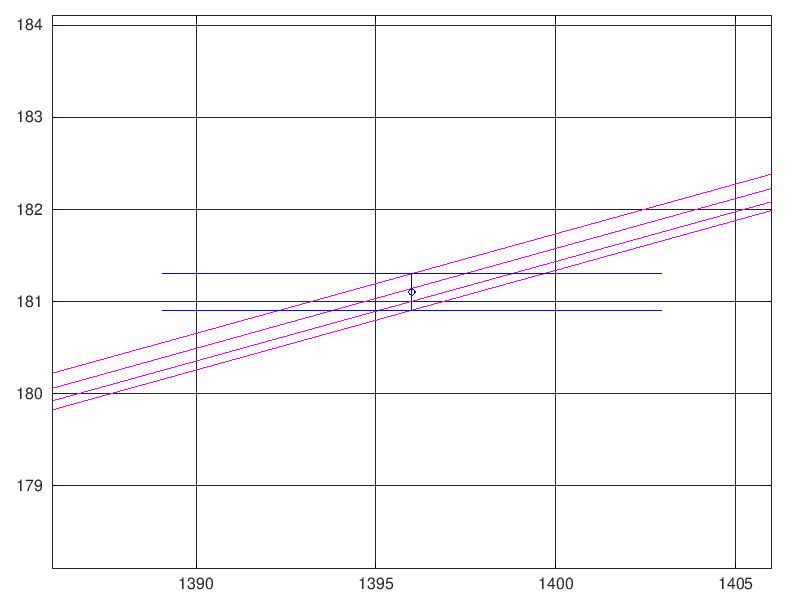

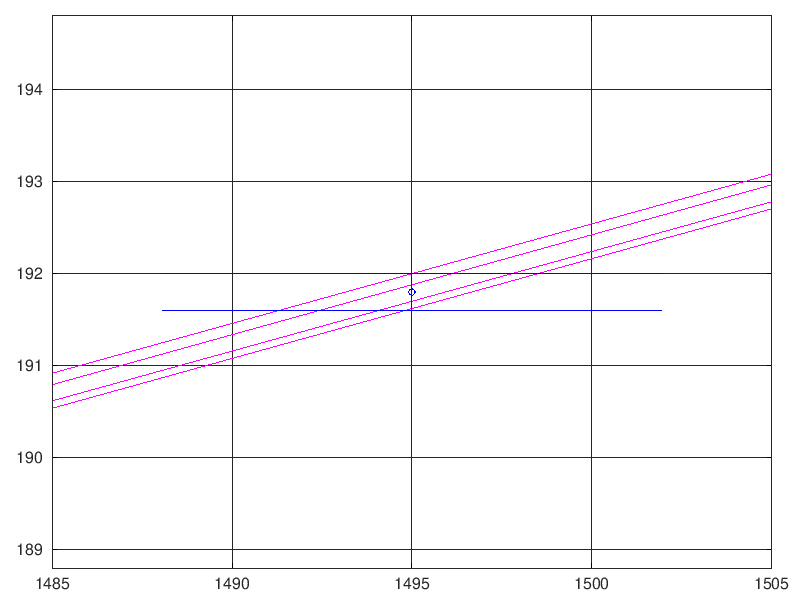

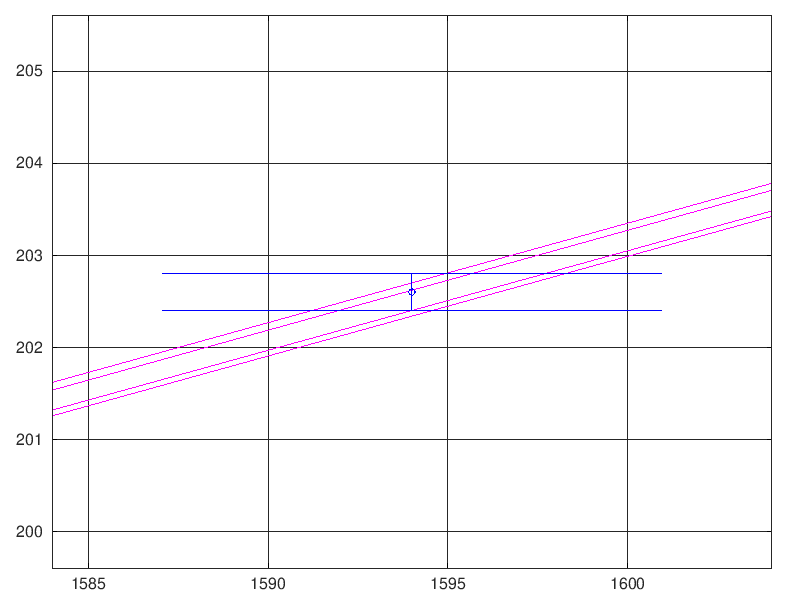

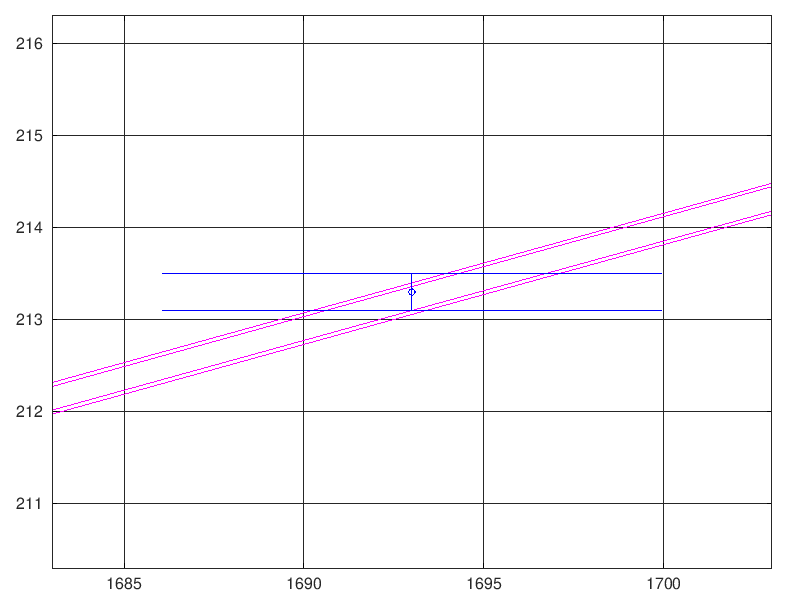

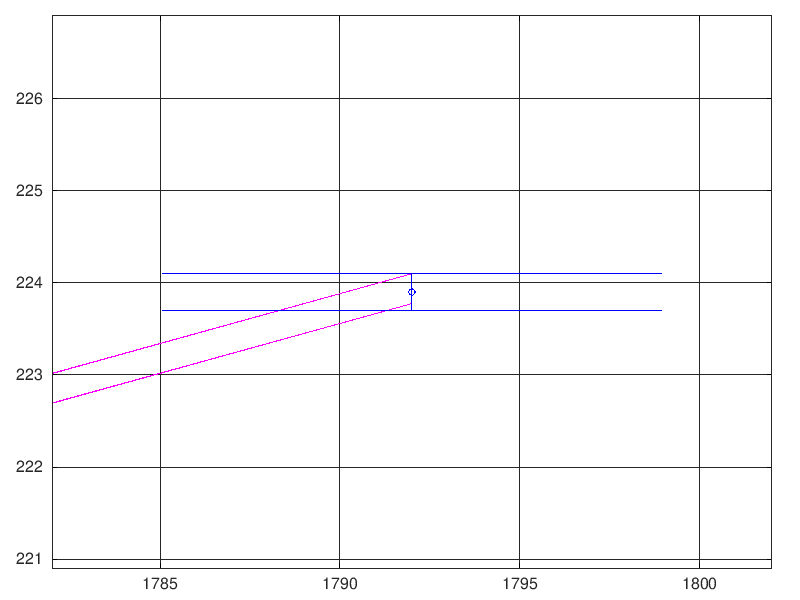

In [43]:
# Граничные точки, графики 
border_x = [-10, 10];
border_y = [-3, 3];
m = n
for i = 1:m

cur_point_x = x(i);
cur_point_y = y(i);

figure('position',[0, 0, 800, 600]);
xlimits = [0 500];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей
hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
grid on
set(gca, 'fontsize', 12)

xlim([cur_point_x + border_x(1), cur_point_x + border_x(2)]);
ylim([cur_point_y + border_y(1), cur_point_y + border_y(2)]);


end